# Notebook overview
Compares training processes of two MLP models (origin vs. resized) by loading their learn_process.csv files and plotting validation & training balanced accuracy, loss, and learning rate across epochs. Saves the combined visualization to the results folder.

### Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

### Path - result_dir_path

In [2]:
### Folder to load results
RESULT_DIR_PATH_ORIGIN = r'/home/stud/jleick/masterArbeitProjekt/models/mlp/origin/model'
result_dir_path_origin = Path(RESULT_DIR_PATH_ORIGIN)
if not result_dir_path_origin.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH_ORIGIN}")

### Folder to load results
RESULT_DIR_PATH_RESIZED = r'/home/stud/jleick/masterArbeitProjekt/models/mlp/resized/model'
result_dir_path_resized = Path(RESULT_DIR_PATH_RESIZED)
if not result_dir_path_resized.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH_RESIZED}")

### Folder to save plot
RESULT_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/models/mlp/visual_comparison'
result_dir_path = Path(RESULT_DIR_PATH)
if not result_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH}")

### Load - learn_process_df

In [3]:
# load df - learn_process
learn_process_path_origin = result_dir_path_origin / "learn_process.csv"
if not learn_process_path_origin.exists():
    raise FileNotFoundError(f"File does not exist: {learn_process_path_origin}")

learn_process_df_origin = pd.read_csv(learn_process_path_origin, index_col=False)

# load df - learn_process
learn_process_path_resized = result_dir_path_resized / "learn_process.csv"
if not learn_process_path_resized.exists():
    raise FileNotFoundError(f"File does not exist: {learn_process_path_resized}")

learn_process_df_resized = pd.read_csv(learn_process_path_resized, index_col=False)

### Function - plot_train_process

In [4]:
# Save training process diagrams as PNG, PDF, and SVG

def plot_train_process(learn_process_df_origin, first_accuracies_val_list, first_accuracies_train_list, first_loss_values, first_lr_list, first_n_epoch,
                       second_accuracies_val_list, second_accuracies_train_list, second_loss_values, second_lr_list):
    
    # Plot accuracies_val
    fig = plt.figure(figsize=(8, 10))
    ax1 = fig.add_subplot(3,1,1)
    ax2 = fig.add_subplot(3,1,2)
    ax3 = fig.add_subplot(3,1,3)

    # Plot für Validation und Training Accuracy
    ax1.plot(range(1, first_n_epoch + 1), first_accuracies_val_list, label='MLP based on Origin Dataset - Validation Test Scores')
    ax1.plot(range(1, first_n_epoch + 1), first_accuracies_train_list, label='MLP based on Origin Dataset - Train Test Scores')
    ax1.plot(range(1, first_n_epoch + 1), second_accuracies_val_list, label='MLP based on Resized Dataset - Validation Test Scores')
    ax1.plot(range(1, first_n_epoch + 1), second_accuracies_train_list, label='MLP based on Resized Dataset - Train Test Scores')

    ax1.set_xticks(range(1, first_n_epoch + 1))
    ax1.set_yticks(np.arange(0, 1.1, 0.1))
    ax1.set_xlabel('Epoch')  # X-Achsenbeschriftung für den ersten Subplot
    ax1.set_ylabel('Balanced Accuracy')  # Y-Achsenbeschriftung für den ersten Subplot
    ax1.set_title('Test Model after every Epoch with Validation and Training Datasets')  # Titel für den ersten Subplot
    ax1.legend()
    ax1.grid(True)
    ax1.set_xlim(1, first_n_epoch)
    ax1.set_ylim(0, 1)

    # Plot für Loss
    ax2.plot(range(1, first_n_epoch + 1), first_loss_values, label='Loss for MLP based on Origin Dataset')
    ax2.plot(range(1, first_n_epoch + 1), second_loss_values, label='Loss for MLP based on Resized Dataset')

    ax2.set_xticks(range(1, first_n_epoch + 1))

    ax2.set_yticks(np.arange(0, 2.2 + 0.1, 0.2))
    ax2.set_xlabel('Epoch')  # X-Achsenbeschriftung für den zweiten Subplot
    ax2.set_ylabel('Loss Values')  # Y-Achsenbeschriftung für den zweiten Subplot
    ax2.set_title('Loss Values for each Epoch')  # Titel für den zweiten Subplot
    ax2.legend()
    ax2.grid(True)
    ax2.set_xlim(1, first_n_epoch)
    ax2.set_ylim(0, 2.2 + 0.1)

    # Plot für Lerning Rate
    ax3.step(range(1, first_n_epoch + 1), first_lr_list, label='Learning Rate for both MLPs (Origin and Resized)')
    ax3.set_xticks(range(1, first_n_epoch + 1))
    ax3.set_yticks(np.arange(0, learn_process_df_origin["Learning_Rate"].max() + 0.00015, 0.0001))
    ax3.set_xlabel('Epoch')  # X-Achsenbeschriftung für den zweiten Subplot
    ax3.set_ylabel('Learning Rate')  # Y-Achsenbeschriftung für den zweiten Subplot
    ax3.set_title('Learning Rates for each  Epoch')  # Titel für den zweiten Subplot
    ax3.legend()
    ax3.grid(True)
    ax3.set_xlim(1, first_n_epoch)
    ax3.set_ylim(0, learn_process_df_origin["Learning_Rate"].max() + 0.00015)

    plt.tight_layout()  # adjust layout to prevent overlap
    return plt


# plt = create_plot_train_process(process["Validation_Balanced_Accuracy"], process["Train_Balanced_Accuracy"], process["Loss (Last Batch)"], process["Learning_Rate"], process["Epoch"].max())
# save_plot(plt,SAVE_RESULTS_FOLDER, "mlp_learning_process_plot")
# plt.show()


### Apply and Save - Plot

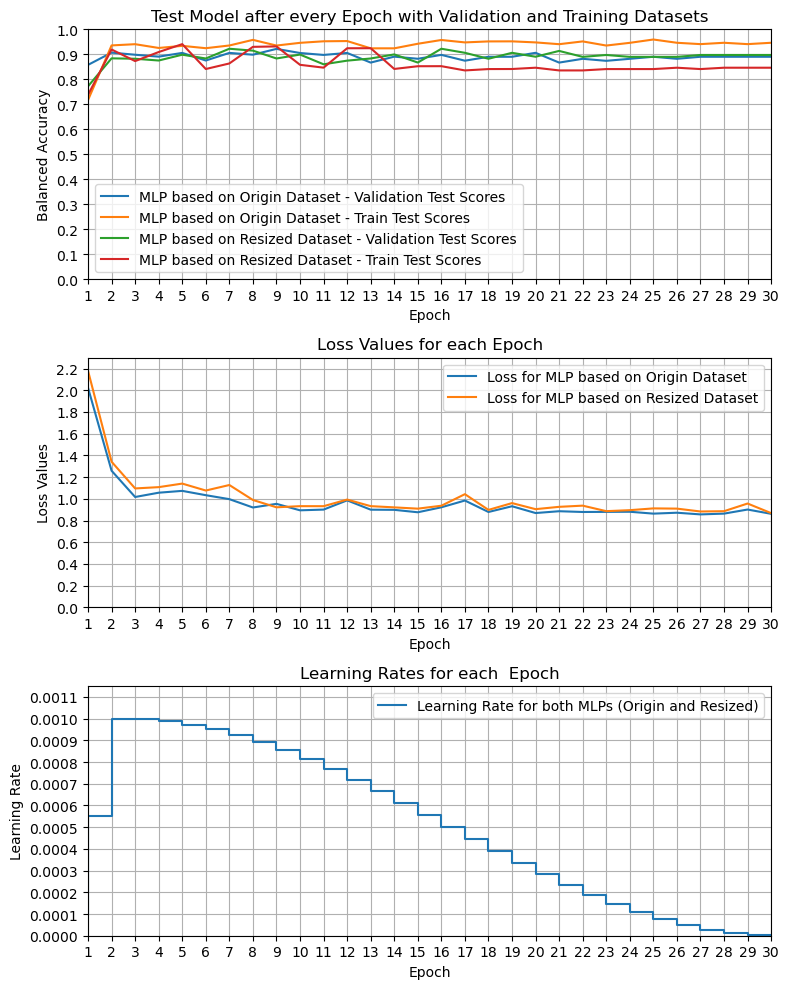

In [5]:
plt = plot_train_process(
    learn_process_df_origin,
    learn_process_df_origin["Validation_Balanced_Accuracy"],
    learn_process_df_origin["Train_Balanced_Accuracy"],
    learn_process_df_origin["Loss (Last Batch)"],
    learn_process_df_origin["Learning_Rate"],
    learn_process_df_origin["Epoch"].max(),
    learn_process_df_resized["Validation_Balanced_Accuracy"],
    learn_process_df_resized["Train_Balanced_Accuracy"],
    learn_process_df_resized["Loss (Last Batch)"],
    learn_process_df_resized["Learning_Rate"]
    )


plt.savefig( result_dir_path / "MLP_learn_process_plot_(origin_resized).pdf")
plt.show()